# Assignment#1 CV

## Syed Saad Ullah Shah
## 400202
## MSDS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
save_modals_path = "/content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Trained Modals/"

In [3]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os
import csv
import pandas as pd
from matplotlib import pyplot as plt

## Feature Detector (BoVW)

### 1): Flowers Dataset

In [4]:
# define the path to your dataset folder
dataset_path = '/content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/flower_photos'

# get a list of all subdirectories in the dataset folder
subdirectories = [os.path.join(dataset_path, d) for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

csv_filename = 'flower.csv'
csv_path = os.path.join(dataset_path, csv_filename)

# adding header
headerList = ['Object', 'Image Path']

with open(csv_path, mode='w', newline='') as csv_file:
    dw = csv.DictWriter(csv_file, delimiter=',', 
                        fieldnames=headerList)
    dw.writeheader()
    
    writer = csv.writer(csv_file)
    
    # loop over each subdirectory
    for folder in subdirectories:
        print(f'Processing folder {folder}')

        # create a CSV file for this object
        object_name = os.path.basename(folder)

        # get a list of all image files in the folder
        image_files = [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

        # write each image path to the CSV file
        for image_file in image_files:
            writer.writerow([object_name, image_file])

# close the CSV file
csv_file.close()


Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/flower_photos/daisy
Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/flower_photos/dandelion
Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/flower_photos/roses
Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/flower_photos/tulips
Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/flower_photos/sunflowers


In [5]:
flower_csv = pd.read_csv(csv_path)

In [6]:
flower_csv.head()

,Object,Image Path
0,daisy,/content/drive/MyDrive/Nust/Semester 2/Compute...
1,daisy,/content/drive/MyDrive/Nust/Semester 2/Compute...
2,daisy,/content/drive/MyDrive/Nust/Semester 2/Compute...
3,daisy,/content/drive/MyDrive/Nust/Semester 2/Compute...
4,daisy,/content/drive/MyDrive/Nust/Semester 2/Compute...


In [7]:
flower_csv.tail()

,Object,Image Path
3665,sunflowers,/content/drive/MyDrive/Nust/Semester 2/Compute...
3666,sunflowers,/content/drive/MyDrive/Nust/Semester 2/Compute...
3667,sunflowers,/content/drive/MyDrive/Nust/Semester 2/Compute...
3668,sunflowers,/content/drive/MyDrive/Nust/Semester 2/Compute...
3669,sunflowers,/content/drive/MyDrive/Nust/Semester 2/Compute...


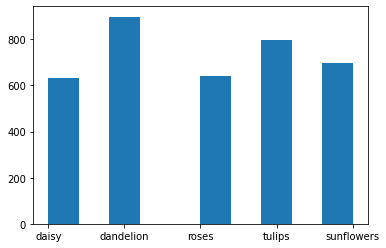

In [8]:
plt.hist(flower_csv["Object"])
plt.show()

### 2): Object Dataset

In [9]:
# define the path to your dataset folder
dataset_path = '/content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Objects_Dataset_Images'

train_dataset_path = os.path.join(dataset_path, 'train')
test_dataset_path = os.path.join(dataset_path, 'test')

# get a list of all subdirectories in the dataset folder
subdirectories_train = [os.path.join(train_dataset_path, d) for d in os.listdir(train_dataset_path) if os.path.isdir(os.path.join(train_dataset_path, d))]
subdirectories_test = [os.path.join(test_dataset_path, d) for d in os.listdir(test_dataset_path) if os.path.isdir(os.path.join(test_dataset_path, d))]

train_csv_filename = 'object_train.csv'
train_csv_path = os.path.join(train_dataset_path, train_csv_filename)

test_csv_filename = 'object_test.csv'
test_csv_path = os.path.join(test_dataset_path, test_csv_filename)

# adding header
headerList = ['Object', 'Image Path']


In [10]:
with open(train_csv_path, mode='w', newline='') as csv_file:
    dw = csv.DictWriter(csv_file, delimiter=',', 
                        fieldnames=headerList)
    dw.writeheader()
    
    writer = csv.writer(csv_file)
    
    # loop over each subdirectory
    for folder in subdirectories_train:
        print(f'Processing folder {folder}')

        # create a CSV file for this object
        object_name = os.path.basename(folder)

        # get a list of all image files in the folder
        image_files = [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

        # write each image path to the CSV file
        for image_file in image_files:
            writer.writerow([object_name, image_file])

# close the CSV file
csv_file.close()

Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Objects_Dataset_Images/train/dollar_bill
Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Objects_Dataset_Images/train/accordion
Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Objects_Dataset_Images/train/Soccer_Ball
Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Objects_Dataset_Images/train/motorbike


In [11]:
with open(test_csv_path, mode='w', newline='') as csv_file:
    dw = csv.DictWriter(csv_file, delimiter=',', 
                        fieldnames=headerList)
    dw.writeheader()
    
    writer = csv.writer(csv_file)
    
    # loop over each subdirectory
    for folder in subdirectories_test:
        print(f'Processing folder {folder}')

        # create a CSV file for this object
        object_name = os.path.basename(folder)

        # get a list of all image files in the folder
        image_files = [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

        # write each image path to the CSV file
        for image_file in image_files:
            writer.writerow([object_name, image_file])

# close the CSV file
csv_file.close()

Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Objects_Dataset_Images/test/motorbike
Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Objects_Dataset_Images/test/accordian
Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Objects_Dataset_Images/test/Soccer_Ball
Processing folder /content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Objects_Dataset_Images/test/dollar_bill


In [12]:
object_train_csv = pd.read_csv(train_csv_path)

In [13]:
object_train_csv.head()

,Object,Image Path
0,dollar_bill,/content/drive/MyDrive/Nust/Semester 2/Compute...
1,dollar_bill,/content/drive/MyDrive/Nust/Semester 2/Compute...
2,dollar_bill,/content/drive/MyDrive/Nust/Semester 2/Compute...
3,dollar_bill,/content/drive/MyDrive/Nust/Semester 2/Compute...
4,dollar_bill,/content/drive/MyDrive/Nust/Semester 2/Compute...


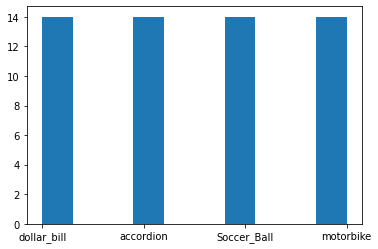

In [14]:
plt.hist(object_train_csv["Object"])
plt.show()

In [15]:
object_test_csv = pd.read_csv(test_csv_path)

In [16]:
object_test_csv.head()

,Object,Image Path
0,motorbike,/content/drive/MyDrive/Nust/Semester 2/Compute...
1,motorbike,/content/drive/MyDrive/Nust/Semester 2/Compute...
2,accordian,/content/drive/MyDrive/Nust/Semester 2/Compute...
3,accordian,/content/drive/MyDrive/Nust/Semester 2/Compute...
4,Soccer_Ball,/content/drive/MyDrive/Nust/Semester 2/Compute...


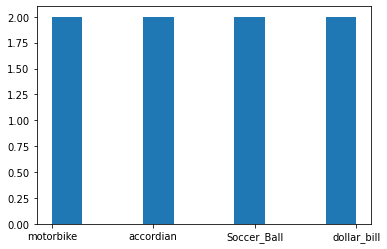

In [17]:
plt.hist(object_test_csv["Object"])
plt.show()

## Feature Detector (BoVW)

### 1): Flower Dataset

In [18]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the data from the CSV file
data = pd.read_csv(csv_path)

# Train-test split the data
train_data, test_data, train_labels, test_labels = train_test_split(data['Image Path'], data['Object'], test_size=0.2)

# Define the feature extractor (e.g., SIFT, SURF, ORB, etc.)
feature_extractor = cv2.SIFT_create()

In [19]:
# Compute the descriptors for all images in the dataset
descriptors = []
for image_path in train_data:
    image = cv2.imread(image_path)
    keypoints, descriptor = feature_extractor.detectAndCompute(image, None)
    if descriptor is not None:
        descriptors.append(descriptor)
train_descriptors = np.vstack(descriptors)

descriptors = []
for image_path in test_data:
    image = cv2.imread(image_path)
    keypoints, descriptor = feature_extractor.detectAndCompute(image, None)
    if descriptor is not None:
        descriptors.append(descriptor)
test_descriptors = np.vstack(descriptors)

In [20]:
train_descriptors

array([[  1.,   3.,   6., ...,   0.,   0.,   0.],
       [121.,  86.,  10., ...,   0.,   0.,   1.],
       [  0.,   0.,   0., ...,  19.,   4.,  20.],
       ...,
       [103.,   7.,  13., ...,   0.,   0.,   0.],
       [ 28.,  17.,  11., ..., 129.,  42.,  26.],
       [ 32.,   1.,   0., ...,  35.,  57.,  34.]], dtype=float32)

In [21]:
test_descriptors

array([[ 12.,  14.,   2., ...,   2.,   0.,   0.],
       [  9.,   3.,   5., ..., 105.,  17.,   1.],
       [ 47.,   8.,   2., ...,   0.,   0.,  19.],
       ...,
       [ 16.,  22.,  11., ...,   0.,   0.,   3.],
       [ 27.,   5.,   4., ...,   0.,   0.,   3.],
       [  8.,   3.,   0., ...,   0.,   0.,   2.]], dtype=float32)

In [22]:
# Cluster the descriptors using k-means
kmeans = KMeans(n_clusters=50)
kmeans.fit(train_descriptors)
visual_vocab = kmeans.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Compute the histogram of visual words for each image
def compute_histogram(image_path):
    image = cv2.imread(image_path)
    keypoints, descriptors = feature_extractor.detectAndCompute(image, None)
    if descriptors is None:
        return None
    # Assign each descriptor to a cluster center
    labels = kmeans.predict(descriptors)
    # Compute the histogram of visual words
    histogram, _ = np.histogram(labels, bins=range(101))
    return histogram

In [24]:
# Compute the histograms for all images in the dataset
histograms = []
for image_path in train_data:
    histogram = compute_histogram(image_path)
    if histogram is not None:
        histograms.append(histogram)
train_histograms = np.array(histograms)

histograms = []
for image_path in test_data:
    histogram = compute_histogram(image_path)
    if histogram is not None:
        histograms.append(histogram)
test_histograms = np.array(histograms)

In [25]:
train_histograms

array([[ 2,  2,  3, ...,  0,  0,  0],
       [ 4,  1,  2, ...,  0,  0,  0],
       [14,  4,  3, ...,  0,  0,  0],
       ...,
       [ 4,  8,  7, ...,  0,  0,  0],
       [ 4,  2,  4, ...,  0,  0,  0],
       [ 5,  5, 17, ...,  0,  0,  0]])

In [26]:
test_histograms

array([[ 3,  0,  0, ...,  0,  0,  0],
       [19,  7,  5, ...,  0,  0,  0],
       [21, 20,  9, ...,  0,  0,  0],
       ...,
       [ 1,  1,  6, ...,  0,  0,  0],
       [12, 11, 14, ...,  0,  0,  0],
       [12,  1, 13, ...,  0,  0,  0]])

In [27]:
from numpy import save

In [28]:
save('/content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Trained Histograms/flower_train_histograms.npy', train_histograms)

In [29]:
save('/content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Trained Histograms/flower_test_histograms.npy', test_histograms)

In [30]:
# Train an SVM classifier on the histogram features
svm = SVC(kernel='linear')
svm.fit(train_histograms, train_labels)

# Make predictions on the test set
test_predictions = svm.predict(test_histograms)

# Compute the accuracy of the classifier
accuracy = accuracy_score(test_labels, test_predictions)
print('Accuracy:', accuracy)

Accuracy: 0.5381471389645777


In [31]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(train_histograms, train_labels)

test_predictions = clf.predict(test_histograms)

# Compute the accuracy of the classifier
accuracy = accuracy_score(test_labels, test_predictions)
print('Accuracy:', accuracy)

Accuracy: 0.5163487738419619


In [32]:
# Saving Modal
import joblib

# save svm modal
joblib.dump(svm, "{save_modals_path}svm_flower_dataset.pkl".format(save_modals_path=save_modals_path)) 

# save random forest modal
joblib.dump(clf, "{save_modals_path}randForest_flower_dataset.pkl".format(save_modals_path=save_modals_path)) 

# load
# clf2 = joblib.load("model.pkl")

['/content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Trained Modals/randForest_flower_dataset.pkl']

### Quantitative performance measures 

#### 1): Random Forest

In [33]:
clf2 = joblib.load("{save_modals_path}randForest_flower_dataset.pkl".format(save_modals_path=save_modals_path))

test_predictions = clf2.predict(test_histograms)

# Compute the accuracy of the classifier
accuracy = accuracy_score(test_labels, test_predictions)
print('Accuracy:', accuracy)

Accuracy: 0.5163487738419619


In [34]:
from sklearn.metrics import f1_score

f1_score_flowers = f1_score(test_labels, test_predictions, average='micro') 
print('f1_score:', f1_score_flowers)

f1_score: 0.5163487738419619


In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(test_labels, test_predictions, target_names=['tulips', 'daisy', 'roses', 'sunflowers', 'dandelion']))

              precision    recall  f1-score   support

      tulips       0.49      0.37      0.42       110
       daisy       0.57      0.72      0.63       182
       roses       0.37      0.38      0.37       114
  sunflowers       0.63      0.58      0.60       158
   dandelion       0.46      0.43      0.44       170

    accuracy                           0.52       734
   macro avg       0.50      0.50      0.50       734
weighted avg       0.51      0.52      0.51       734



#### 2): SVM

In [37]:
svm2 = joblib.load("{save_modals_path}svm_flower_dataset.pkl".format(save_modals_path=save_modals_path))

# Make predictions on the test set
test_predictions = svm2.predict(test_histograms)

# Compute the accuracy of the classifier
accuracy = accuracy_score(test_labels, test_predictions)
print('Accuracy:', accuracy)

Accuracy: 0.5381471389645777


In [38]:
print(classification_report(test_labels, test_predictions, target_names=['tulips', 'daisy', 'roses', 'sunflowers', 'dandelion']))

              precision    recall  f1-score   support

      tulips       0.49      0.45      0.46       110
       daisy       0.60      0.72      0.65       182
       roses       0.38      0.39      0.38       114
  sunflowers       0.69      0.66      0.68       158
   dandelion       0.45      0.39      0.42       170

    accuracy                           0.54       734
   macro avg       0.52      0.52      0.52       734
weighted avg       0.53      0.54      0.53       734



In [39]:
from sklearn.metrics import f1_score

f1_score_flowers = f1_score(test_labels, test_predictions, average='micro') 
print('f1_score:', f1_score_flowers)

f1_score: 0.5381471389645777


### Qualitative results

In [48]:
test_labels.head()

970      dandelion
993      dandelion
3323    sunflowers
123          daisy
1369     dandelion
Name: Object, dtype: object

In [49]:
test_predictions[:5]

array(['dandelion', 'dandelion', 'daisy', 'daisy', 'dandelion'],
      dtype=object)

Here daisy and dandelion are predicted correctly and the other 3 are incorrently predicted.

### 2): Object Dataset

In [50]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Train-test split the data
train_data, test_data = object_train_csv['Image Path'], object_test_csv['Image Path']
train_labels, test_labels = object_train_csv['Object'], object_test_csv['Object']

# Define the feature extractor (e.g., SIFT, SURF, ORB, etc.)
feature_extractor = cv2.SIFT_create()

In [51]:
# Compute the descriptors for all images in the dataset
descriptors = []
for image_path in train_data:
    image = cv2.imread(image_path)
    keypoints, descriptor = feature_extractor.detectAndCompute(image, None)
    if descriptor is not None:
        descriptors.append(descriptor)
train_descriptors = np.vstack(descriptors)

descriptors = []
for image_path in test_data:
    image = cv2.imread(image_path)
    keypoints, descriptor = feature_extractor.detectAndCompute(image, None)
    if descriptor is not None:
        descriptors.append(descriptor)
test_descriptors = np.vstack(descriptors)

In [52]:
train_descriptors

array([[142.,  38.,   1., ...,   0.,   1.,   9.],
       [  0.,   0.,   1., ...,   2.,   4.,   7.],
       [ 35.,   9.,   1., ...,   0.,   0.,   1.],
       ...,
       [  0.,   0.,   0., ...,  15.,   6.,   2.],
       [  1.,   0.,   0., ...,  31.,  37.,   1.],
       [  1.,   0.,   0., ...,  20.,  15.,   0.]], dtype=float32)

In [53]:
test_descriptors

array([[ 10.,  20.,   9., ...,   0.,   0.,  22.],
       [  9., 120.,  99., ...,   0.,   1.,  33.],
       [ 89.,   8.,  21., ...,   0.,   0.,   0.],
       ...,
       [  1.,  10.,  21., ...,   2.,   0.,   3.],
       [  7.,  38.,  37., ...,   1.,   3.,   6.],
       [ 68.,  25.,   8., ...,   2.,   0.,   0.]], dtype=float32)

In [56]:
# Cluster the descriptors using k-means
kmeans = KMeans(n_clusters=100)
kmeans.fit(train_descriptors)
visual_vocab = kmeans.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
# Compute the histogram of visual words for each image
def compute_histogram(image_path):
    image = cv2.imread(image_path)
    keypoints, descriptors = feature_extractor.detectAndCompute(image, None)
    if descriptors is None:
        return None
    # Assign each descriptor to a cluster center
    labels = kmeans.predict(descriptors)
    # Compute the histogram of visual words
    histogram, _ = np.histogram(labels, bins=range(101))
    return histogram

In [58]:
# Compute the histograms for all images in the dataset
histograms = []
for image_path in train_data:
    histogram = compute_histogram(image_path)
    if histogram is not None:
        histograms.append(histogram)
train_histograms = np.array(histograms)

histograms = []
for image_path in test_data:
    histogram = compute_histogram(image_path)
    if histogram is not None:
        histograms.append(histogram)
test_histograms = np.array(histograms)

In [59]:
train_histograms

array([[ 2,  2,  4, ...,  2,  4,  6],
       [ 0,  3, 10, ...,  2, 12,  2],
       [ 4, 15, 16, ...,  1,  2,  2],
       ...,
       [ 1,  1,  3, ...,  1,  1,  3],
       [ 1,  1,  1, ...,  1,  1,  3],
       [ 0,  1,  3, ...,  2,  1,  2]])

In [60]:
test_histograms

array([[ 2,  3,  5,  2,  2,  3,  2,  4,  3,  3,  2,  1,  2,  3,  1,  3,
         0,  5,  0,  3,  0,  0,  1,  5,  1,  1,  1,  1,  2,  1,  1,  1,
         3,  0,  2,  1,  7,  0,  2,  2,  0,  4,  1,  1,  6,  2,  6,  1,
         0,  2,  0,  1,  3,  0,  2,  1,  1,  2,  0,  2,  3,  6,  1,  2,
         2,  1,  3,  0,  0,  0,  3,  1,  1,  0,  2,  4,  3,  0,  2,  6,
         1,  5,  3,  0,  4,  2,  7,  3,  2,  0,  6,  0,  5,  0,  3,  2,
         1,  2,  0,  1],
       [ 9,  1,  1,  3,  2,  2,  6,  1,  2,  8,  5,  0,  0,  4,  9,  5,
         2,  8,  2,  2,  3,  5,  3,  0,  9,  3,  2,  2,  6,  2,  5,  3,
         9,  4,  4,  0,  3,  0,  3,  2,  0,  4,  3,  0,  3,  5,  1,  1,
         0,  1,  3,  4,  2,  1,  3,  1,  4,  5,  0,  1,  3,  4,  3,  4,
         1,  6,  7,  0,  0,  1,  2,  4,  4,  2,  2,  4,  1,  9,  7,  7,
         7,  7,  3,  1,  6,  9,  3,  9,  2,  4,  3,  1,  0,  1,  6,  4,
         1,  3,  3,  7],
       [ 9, 33,  4,  7, 18, 47,  3, 13, 11,  5,  3,  1, 22,  7,  5,  9,
         3,  0

In [61]:
from numpy import save

In [62]:
save('/content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Trained Histograms/object_train_histograms.npy', train_histograms)

In [63]:
save('/content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Trained Histograms/object_test_histograms.npy', test_histograms)

In [64]:
train_histograms.shape

(56, 100)

In [65]:
train_labels.shape

(56,)

In [66]:
# Train an SVM classifier on the histogram features
svm = SVC(kernel='linear')
svm.fit(train_histograms, train_labels)

# Make predictions on the test set
test_predictions = svm.predict(test_histograms)

# Compute the accuracy of the classifier
accuracy = accuracy_score(test_labels, test_predictions)
print('Accuracy:', accuracy)

Accuracy: 0.75


In [67]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(train_histograms, train_labels)

test_predictions = clf.predict(test_histograms)

# Compute the accuracy of the classifier
accuracy = accuracy_score(test_labels, test_predictions)
print('Accuracy:', accuracy)

Accuracy: 0.625


In [68]:
# Saving Modal
import joblib

# save svm modal
joblib.dump(svm, "{save_modals_path}svm_object_dataset.pkl".format(save_modals_path=save_modals_path)) 

# save random forest modal
joblib.dump(clf, "{save_modals_path}randForest_object_dataset.pkl".format(save_modals_path=save_modals_path)) 

# load
# clf2 = joblib.load("model.pkl")

['/content/drive/MyDrive/Nust/Semester 2/Computer Vision/Assignments/Assignment 1/CV_MSDS_Assignment1/Trained Modals/randForest_object_dataset.pkl']

### Quantitative performance measures 

#### 1): SVM

In [69]:
svm2 = joblib.load("{save_modals_path}svm_object_dataset.pkl".format(save_modals_path=save_modals_path))

# Make predictions on the test set
test_predictions = svm.predict(test_histograms)

# Compute the accuracy of the classifier
accuracy = accuracy_score(test_labels, test_predictions)
print('Accuracy:', accuracy)

Accuracy: 0.75


In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(test_labels, test_predictions, labels=['motorbike', 'accordian', 'dollar_bill', 'Soccer_Ball']))

              precision    recall  f1-score   support

   motorbike       1.00      1.00      1.00         2
   accordian       0.00      0.00      0.00         2
 dollar_bill       1.00      1.00      1.00         2
 Soccer_Ball       1.00      1.00      1.00         2

   micro avg       1.00      0.75      0.86         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 2): Random Forest

In [72]:
clf2 = joblib.load("{save_modals_path}randForest_object_dataset.pkl".format(save_modals_path=save_modals_path))

test_predictions = clf.predict(test_histograms)

# Compute the accuracy of the classifier
accuracy = accuracy_score(test_labels, test_predictions)
print('Accuracy:', accuracy)

Accuracy: 0.625


In [73]:
from sklearn.metrics import f1_score

f1_score_flowers = f1_score(test_labels, test_predictions, average='micro') 
print('f1_score:', f1_score_flowers)

f1_score: 0.625


In [74]:
print(classification_report(test_labels, test_predictions, labels=['motorbike', 'accordian', 'dollar_bill', 'Soccer_Ball']))

              precision    recall  f1-score   support

   motorbike       1.00      0.50      0.67         2
   accordian       0.00      0.00      0.00         2
 dollar_bill       0.67      1.00      0.80         2
 Soccer_Ball       0.67      1.00      0.80         2

   micro avg       0.71      0.62      0.67         8
   macro avg       0.58      0.62      0.57         8
weighted avg       0.58      0.62      0.57         8



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Qualitative results

In [75]:
test_labels

0      motorbike
1      motorbike
2      accordian
3      accordian
4    Soccer_Ball
5    Soccer_Ball
6    dollar_bill
7    dollar_bill
Name: Object, dtype: object

In [76]:
test_predictions

array(['motorbike', 'Soccer_Ball', 'accordion', 'dollar_bill',
       'Soccer_Ball', 'Soccer_Ball', 'dollar_bill', 'dollar_bill'],
      dtype=object)

Here first elemet i.e. "motorbike" is predicted accuractly and 2nd item "motorbike" is predicted incorrectly